In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
data = pd.read_csv("bank-additional-full.csv",sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Explore Data 

In [112]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [113]:
col = data.columns.tolist()
col_num = data.select_dtypes(include=np.number).columns.tolist()

In [114]:
print("Number of unique values stat:")
data.nunique()

Number of unique values stat:


age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [115]:
data.describe().applymap('{:,.0f}'.format)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,"41,188","41,188","41,188","41,188","41,188","41,188","41,188","41,188","41,188","41,188"
mean,40,258,3,962,0,0,94,-41,4,"5,167"
std,10,259,3,187,0,2,1,5,2,72
min,17,0,1,0,0,-3,92,-51,1,"4,964"
25%,32,102,1,999,0,-2,93,-43,1,"5,099"
50%,38,180,2,999,0,1,94,-42,5,"5,191"
75%,47,319,3,999,0,1,94,-36,5,"5,228"
max,98,"4,918",56,999,7,1,95,-27,5,"5,228"


### Outliers Removal

In [116]:
# Outliers removal using Interquartile range(IQR) statistical method
def outliers_iqr(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

for col in col_num:
    upper, lower = outliers_iqr(data, col)
    print(str(col)+":")
    print("Upper limit: ", upper)
    print("Lower limit: ", lower)
    if upper > lower:
        data_iqr = data[(data[col] > lower) & (data[col] < upper)]

data_iqr.describe().applymap('{:,.0f}'.format)

age:
Upper limit:  69.5
Lower limit:  9.5
duration:
Upper limit:  644.5
Lower limit:  -223.5
campaign:
Upper limit:  6.0
Lower limit:  -2.0
pdays:
Upper limit:  999.0
Lower limit:  999.0
previous:
Upper limit:  0.0
Lower limit:  0.0
emp.var.rate:
Upper limit:  6.200000000000001
Lower limit:  -6.6000000000000005
cons.price.idx:
Upper limit:  95.3725
Lower limit:  91.69650000000001
cons.conf.idx:
Upper limit:  -26.949999999999992
Lower limit:  -52.150000000000006
euribor3m:
Upper limit:  10.3865
Lower limit:  -4.081499999999999
nr.employed:
Upper limit:  5421.6
Lower limit:  4905.6


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,"41,188","41,188","41,188","41,188","41,188","41,188","41,188","41,188","41,188","41,188"
mean,40,258,3,962,0,0,94,-41,4,"5,167"
std,10,259,3,187,0,2,1,5,2,72
min,17,0,1,0,0,-3,92,-51,1,"4,964"
25%,32,102,1,999,0,-2,93,-43,1,"5,099"
50%,38,180,2,999,0,1,94,-42,5,"5,191"
75%,47,319,3,999,0,1,94,-36,5,"5,228"
max,98,"4,918",56,999,7,1,95,-27,5,"5,228"


## Handling with NA values

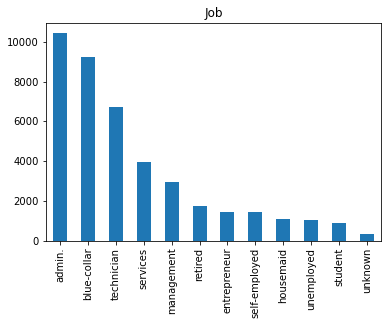

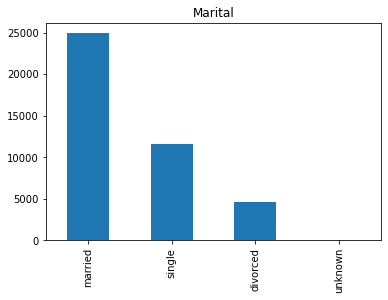

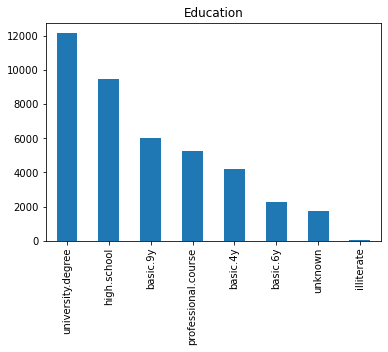

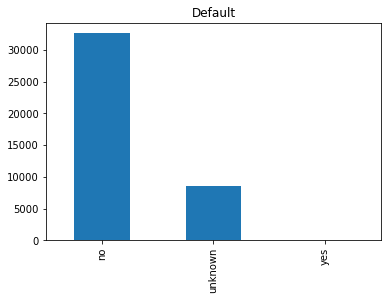

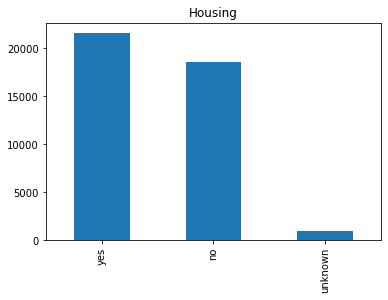

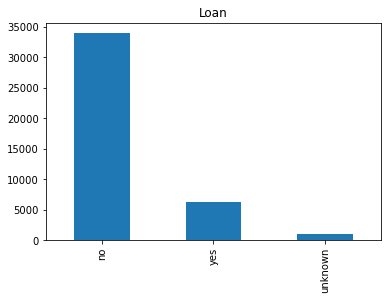

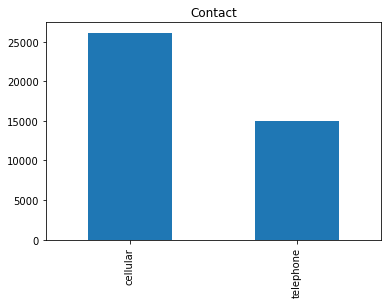

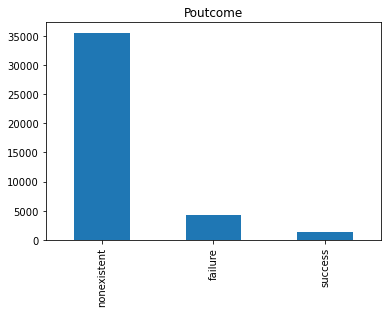

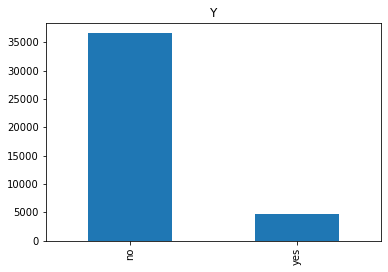

In [117]:
plt.title('Job')
data.job.value_counts().plot(kind='bar')
plt.show()
plt.title('Marital')
data.marital.value_counts().plot(kind='bar')
plt.show()
plt.title('Education')
data.education.value_counts().plot(kind='bar')
plt.show()
plt.title('Default')
data.default.value_counts().plot(kind='bar')  
plt.show()
plt.title('Housing')
data.housing.value_counts().plot(kind='bar')
plt.show()
plt.title('Loan')
data.loan.value_counts().plot(kind='bar')
plt.show()
plt.title('Contact')
data.contact.value_counts().plot(kind='bar')
plt.show()
plt.title('Poutcome')
data.poutcome.value_counts().plot(kind='bar')
plt.show()
plt.title('Y')
data.y.value_counts().plot(kind='bar')
plt.show()

In [118]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [119]:
strings = [x for x in data.columns if type(data[x].loc[data[x].first_valid_index()])==str]

for columns in strings:
  print(columns, ':', len(data[data[columns].str.contains('unknown')]))

job : 330
marital : 80
education : 1731
default : 8597
housing : 990
loan : 990
contact : 0
month : 0
day_of_week : 0
poutcome : 0
y : 0


In [120]:
#There are 288 unknown in Job column, 1857 in education, 13020 in contact and 36959 in poutcome
data['job'] = data['job'].replace(['unknown'],np.nan)
data['education'] = data['education'].replace(['unknown'],np.nan)
data['contact'] = data['contact'].replace(['unknown'],np.nan)
data['poutcome'] = data['poutcome'].replace(['unknown'],np.nan)

In [121]:
data=data.dropna()

In [122]:
data.isnull().mean().sum()

0.0

### Data Visualization

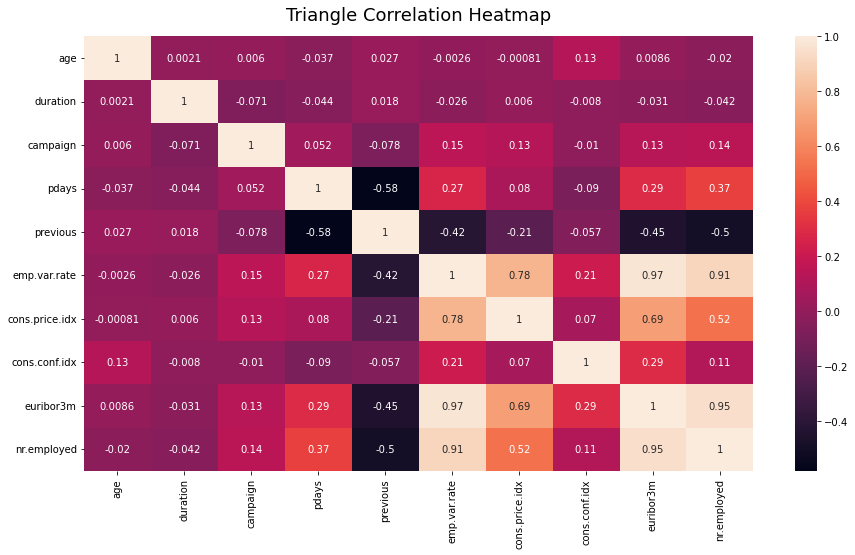

In [123]:
plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(data.corr(), annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In the above correlation map, it's seen that emp.var.rate, cons.price.idx, euribor3m, nr.employed have a high correlation ratio.

In [124]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Column Analysis

In [125]:
# Housing Column Analysis
# It's seen that the housing credit ratio is divided nearly half by half.

data_housing_column=data.groupby("housing")["age"].count()
data_housing_column=pd.DataFrame(data_housing_column)
data_housing_column = data_housing_column.rename_axis('housing').reset_index()
data_housing_column.rename(columns = {'age':'user'}, inplace = True)
data_housing_column.head()

,housing,user
0,no,17706
1,unknown,947
2,yes,20605


In [126]:
# Loan Column Analysis
# Most of the users don't have a loan.

data_loan_column=data.groupby("loan")["age"].count()
data_loan_column=pd.DataFrame(data_loan_column)
data_loan_column = data_loan_column.rename_axis('loan').reset_index()
data_loan_column.rename(columns = {'age':'user'}, inplace = True)
data_loan_column.head()

,loan,user
0,no,32344
1,unknown,947
2,yes,5967


In [127]:
# Default Column Analysis
# It's seen that most of the users don't have credit.

data_default_column=data.groupby("default")["age"].count()
data_default_column=pd.DataFrame(data_default_column)
data_default_column = data_default_column.rename_axis('default').reset_index()
data_default_column.rename(columns = {'age':'user'}, inplace = True)
data_default_column.head()

,default,user
0,no,31284
1,unknown,7971
2,yes,3


In [128]:
# y Column Analysis

data_y_column=data.groupby("y")["age"].count()
data_y_column=pd.DataFrame(data_y_column)
data_y_column = data_y_column.rename_axis('y').reset_index()
data_y_column.rename(columns = {'age':'user'}, inplace = True)
data_y_column.head()

,y,user
0,no,34889
1,yes,4369


In [129]:
# Age Column Analysis

bins= [18,25,40,60,100]
labels = ['18-24','25-39','40-59','60+']
data['AgeGroup'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

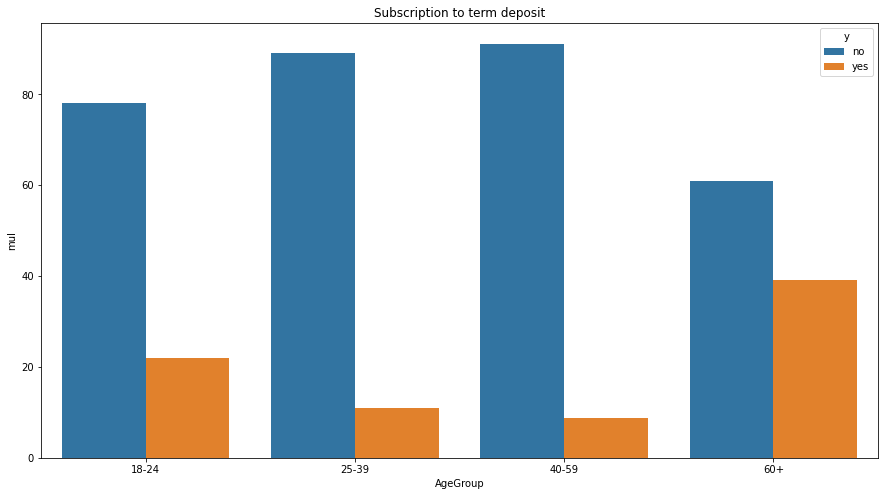

In [130]:
# Normalize to understand better
data_age_column=data.groupby("AgeGroup")["y"].value_counts(normalize=True).mul(100)
data_age_column=pd.DataFrame(data_age_column)

data_age_column.rename(columns = {'y':'mul'}, inplace = True)
data_age_column=data_age_column.reset_index()

plt.figure(figsize=(15,8))
plt.title("Subscription to term deposit by age")
sns.barplot(data=data_age_column,hue="y",x="AgeGroup",y="mul");

# It's seen that nearly half of the 60+ users had subscribed to term deposit.

In [136]:
# Job Column Analsis

data_job_column=data.groupby("job")["age"].count()
data_job_column=pd.DataFrame(data_job_column)
data_job_column = data_job_column.rename_axis('job').reset_index()
data_job_column.rename(columns = {'age':'user'}, inplace = True)
data_job_column.head()

,job,user
0,admin.,10173
1,blue-collar,8800
2,entrepreneur,1399
3,housemaid,1018
4,management,2801


In [162]:
job_count=data.groupby(["y","job"])["job"].agg(["count"])
job_count=job_count.reset_index()
job_count

,y,job,count
0,no,admin.,8859
1,no,blue-collar,8186
2,no,entrepreneur,1279
3,no,housemaid,917
4,no,management,2493
5,no,retired,1221
6,no,self-employed,1245
7,no,services,3515
8,no,student,492
9,no,technician,5826


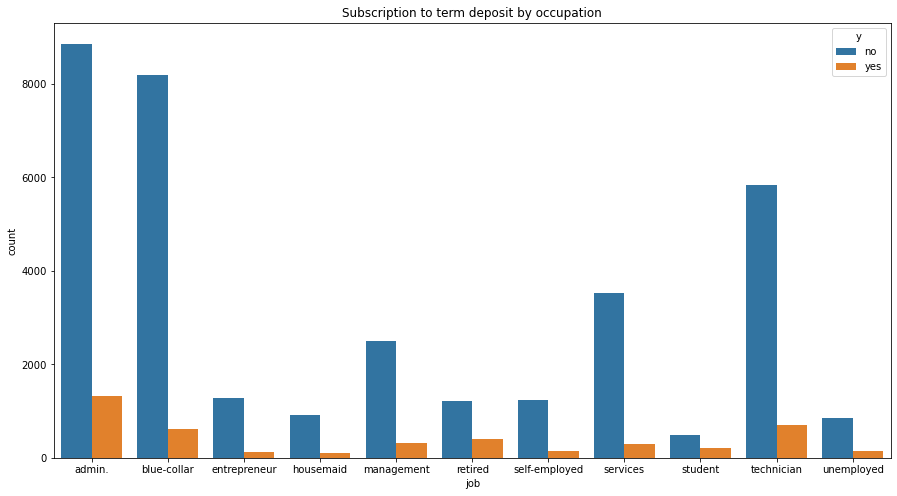

In [164]:
plt.figure(figsize=(15,8))
plt.title("Subscription to term deposit by occupation")
sns.barplot(data=job_count,hue="y",x="job",y="count");

In [141]:
# Martial Column Analysis

data_marital_column=data.groupby("marital")["age"].count()
data_marital_column=pd.DataFrame(data_marital_column)
data_marital_column = data_marital_column.rename_axis('marital').reset_index()
data_marital_column.rename(columns = {'age':'user'}, inplace = True)
data_marital_column.head()

,marital,user
0,divorced,4417
1,married,23748
2,single,11026
3,unknown,67


In [145]:
data_ratio_marital=data.groupby("AgeGroup")["marital"].value_counts()
data_ratio_marital
# It can be said that younger people mostly single while older ones aree married.

AgeGroup  marital 
18-24     single        829
          married       127
          divorced        4
25-39     married     10908
          single       8420
          divorced     1524
          unknown        43
40-59     married     11907
          divorced     2677
          single       1739
          unknown        22
60+       married       806
          divorced      212
          single         35
          unknown         2
Name: marital, dtype: int64

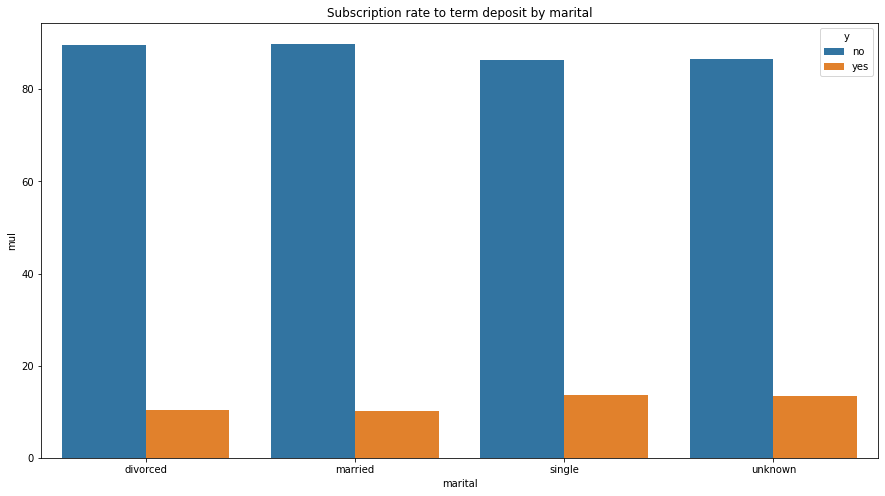

In [146]:
data_marital_column=data.groupby("marital")["y"].value_counts(normalize=True).mul(100)
data_marital_column=pd.DataFrame(data_marital_column)
data_marital_column.rename(columns = {'y':'mul'}, inplace = True)
data_marital_column=data_marital_column.reset_index()
plt.figure(figsize=(15,8))
plt.title("Subscription rate to term deposit by marital")
sns.barplot(data=data_marital_column,hue="y",x="marital",y="mul");

In [151]:
# Month Column Analysis

data_month_column=data.groupby("month")["age"].count()
data_month_column=pd.DataFrame(data_month_column)
data_month_column = data_month_column.rename_axis('month').reset_index()
data_month_column.rename(columns = {'age':'user'}, inplace = True)
data_month_column


,month,user
0,apr,2496
1,aug,5957
2,dec,167
3,jul,6771
4,jun,5023
5,mar,511
6,may,13156
7,nov,3980
8,oct,681
9,sep,516


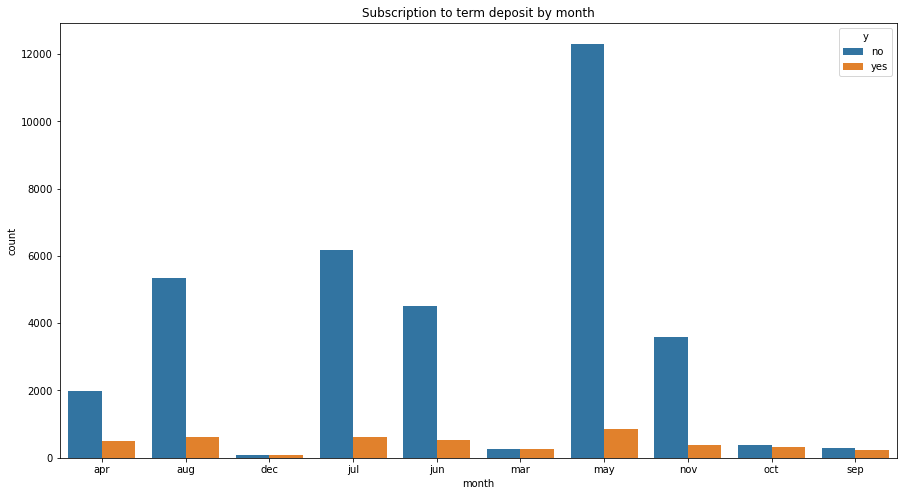

In [156]:
month_count=data.groupby(["y","month"])['month'].agg(["count"])
month_count=month_count.reset_index()
plt.figure(figsize=(15,8))
plt.title("Subscription to term deposit by month")
sns.barplot(data=month_count,hue="y",x="month",y="count");

In [157]:
# Education Column Analysis

data_education_column=data.groupby("education")["age"].count()
data_education_column=pd.DataFrame(data_education_column)
data_education_column = data_education_column.rename_axis('education').reset_index()
data_education_column.rename(columns = {'age':'user'}, inplace = True)
data_education_column.head()

,education,user
0,basic.4y,4124
1,basic.6y,2270
2,basic.9y,6014
3,high.school,9478
4,illiterate,18


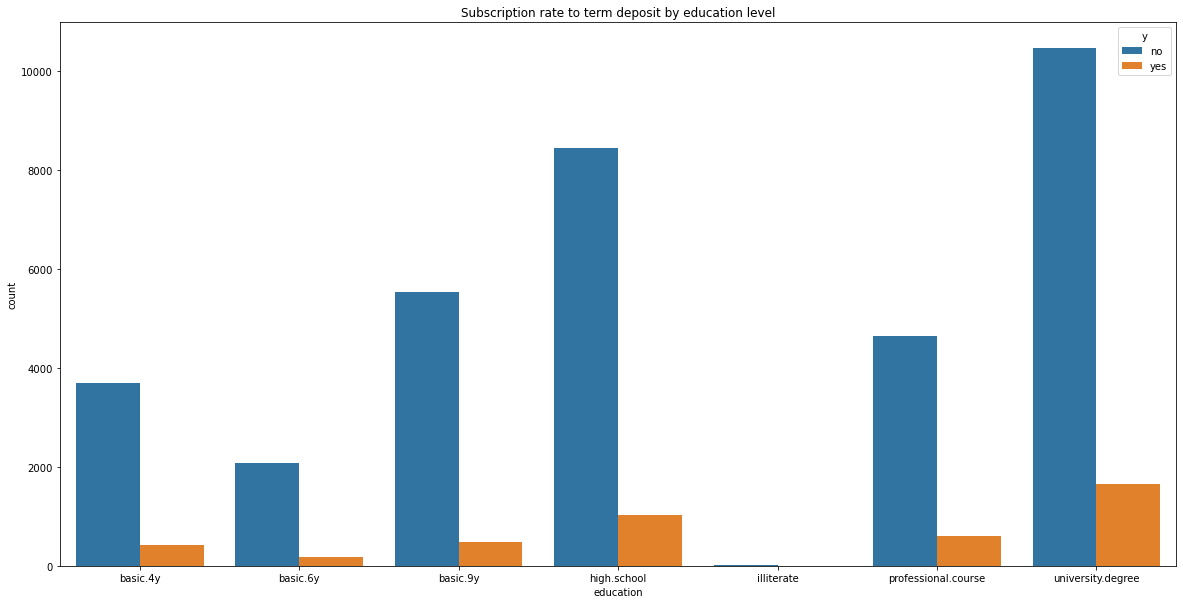

In [159]:
education_count=data.groupby(["y","education"])["education"].agg(["count"])
education_count=education_count.reset_index()
plt.figure(figsize=(20,10))
plt.title("Subscription rate to term deposit by education level")
sns.barplot(data=education_count,hue="y",x="education",y="count");